In [199]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## � аспределение  хи-квадрат с k степенями свободы:

https://ru.wikipedia.org/wiki/� аспределение_хи-квадрат

In [178]:
x = np.linspace(0,10,100)

In [388]:
k=3

Построим график теоретической функции плотности распределения:

In [389]:
pdf = sts.chi2.pdf(x,k)

Text(0.5,0,'$x$')

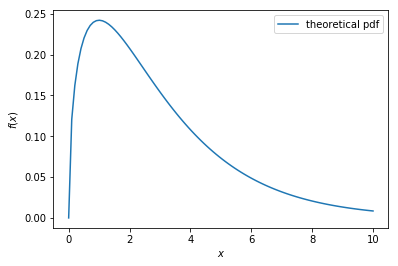

In [390]:
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Сгенерируем выборку размера 100,  выведем на график гистограмму выборки теоретическую плотность распределения

In [391]:
chi2_rv = sts.chi2(k)
sample = chi2_rv.rvs(1000)

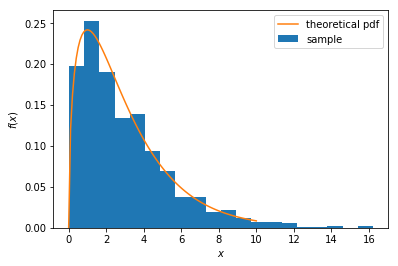

In [392]:
plt.hist(sample,bins=20,normed=True, label='sample')
plt.plot(x, pdf, label='theoretical pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

� ассчитаем теоретические параметры распределения: EX=k, DX=2k

In [393]:
EX=float(k)
DX=float(2*k)
print('EX='+str(EX))
print('DX='+str(DX))

EX=3.0
DX=6.0


Зададим функцию подсчета выборочных средних для 1000 выборок размера n:

In [394]:
def Chi2_RVS(n):
    SM=[]
    for i in range(0,1000):
        sm=0
        sample=chi2_rv.rvs(n)
        for j in sample:
            sm+=j
        SM.append(sm/n)
    return SM

Для выборок объема n=5 построим теоритическую функцию плотности нормального распределения с математическим ожиданием EXn=EX и дисперсией DXn=DX/n.
Выведем на график гистограмму выборочных средних и теоретическую функцию плотности распределния выборочных средних:

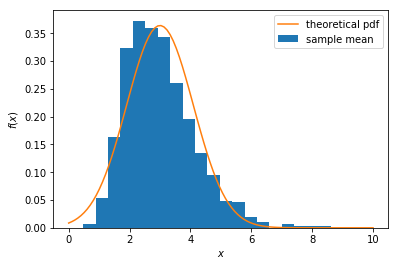

In [416]:
n=5
EX_rv=sts.norm.pdf(x,EX,math.sqrt(DX/n))
SM=Chi2_RVS(n)
plt.hist(SM,bins=20,normed=True, label='sample mean')
plt.plot(x,EX_rv, label='theoretical pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

Аналогичные действия проделаем для выборок размера n=10 и n=50

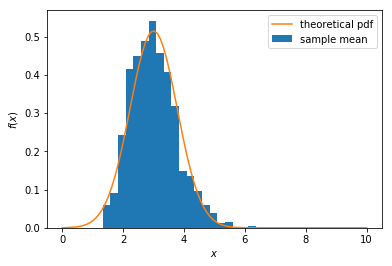

In [419]:
n=10
EX_rv=sts.norm.pdf(x,EX,math.sqrt(DX/n))
SM=Chi2_RVS(n)
plt.hist(SM,bins=20,normed=True, label='sample mean')
plt.plot(x,EX_rv, label='theoretical pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

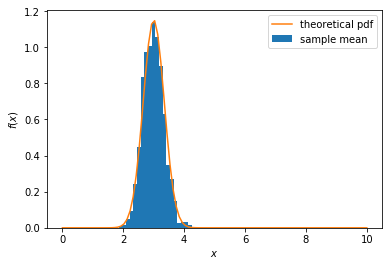

In [414]:
n=50
EX_rv=sts.norm.pdf(x,EX,math.sqrt(DX/n))
SM=Chi2_RVS(n)
plt.hist(SM,bins=20,normed=True, label='sample mean')
plt.plot(x,EX_rv, label='theoretical pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

Из приведенных выше графиков видно, как при увеличении объема выборки n распределение выборочных средних становится более гладким и лучше аппроксимируется нормальным, кроме тога уменьшается разброс и график сходится к теоретическому МО распределения случайной велечины.